In [1]:
from feature_extractors.HESIFT import *
import cv2
# Show the figures / plots inside the notebook
%matplotlib inline

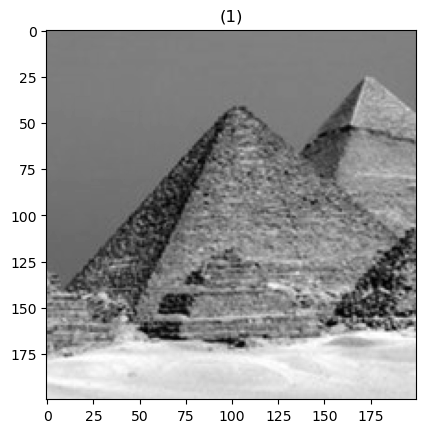

In [2]:
# Preparing the test image
pyramids = io.imread("images/pyramids.jpeg")
baseImage = (rgb2gray(pyramids) * 255).astype(np.int64)
baseImage = baseImage[500:700, 200:400]
show_images([baseImage])

In [3]:
num_octaves = computeNumberOfOctaves(baseImage.shape)
gaussian_kernels = generateGaussianKernels(0.7, 3)
encryptedBaseImage = encryptImage(baseImage)
encryptedGaussianImages = generateEncryptedGaussianImages(encryptedBaseImage, num_octaves, gaussian_kernels)
encryptedDOGImages = generateEncryptedDoGImages(encryptedGaussianImages)

Generating Gaussian Kernels...
Generating Gaussian images...
Octave 1 Running:
Octave 1 Done!!!
-----------------------------------------------------------------------
Octave 2 Running:
Octave 2 Done!!!
-----------------------------------------------------------------------
Octave 3 Running:
Octave 3 Done!!!
-----------------------------------------------------------------------
Octave 4 Running:
Octave 4 Done!!!
-----------------------------------------------------------------------
Octave 5 Running:
Octave 5 Done!!!
-----------------------------------------------------------------------
Octave 6 Running:
Octave 6 Done!!!
-----------------------------------------------------------------------
Octave 7 Running:
Octave 7 Done!!!
-----------------------------------------------------------------------
Generating Difference-of-Gaussian images...
Octave 1 Running:
Octave 1 Done!!!
-----------------------------------------------------------------------
Octave 1 Running:
Octave 1 Done!!!
----

In [4]:
x=findDecryptedScaleSpaceExtrema(encryptedGaussianImages,encryptedDOGImages,3,0.7,5)


In [5]:
print(type(x[0]))
print(len(x))

<class 'cv2.KeyPoint'>
4688


In [ ]:
decryptedDOGImages = []
for octave in encryptedDOGImages:
    show_images(octave)
    decryptedOctave = []
    for image in octave:
        decryptedOctave.append(decryptImage(image))
    decryptedDOGImages.append(decryptedOctave)

In [ ]:
for octave in decryptedDOGImages:
    show_images(octave)

In [ ]:
for y in x:
    if y.pt==(210.5706787109375, 131.22010803222656):
        print(True)
     

In [ ]:
def isEncryptedPixelAnExtremumm(first_subimage, second_subimage, third_subimage, threshold):
    """Return True if the center element of the 3x3x3 input array is strictly greater than or less than all its neighbors, False otherwise
    """
    center_pixel_value = second_subimage[1, 1]
    tensor_center_pixel = np.full((3,3),center_pixel_value)
    tensor_neighbor_pixels = np.array([first_subimage,second_subimage,third_subimage])
    if center_pixel_value > threshold:
            local_maxima = tensor_homomorphicComparator(tensor_center_pixel,tensor_neighbor_pixels)
            if not local_maxima:
                return tensor_homomorphicComparator(tensor_center_pixel,tensor_neighbor_pixels,False)
            return local_maxima

    return False

In [ ]:
image_1 = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])
image_2 = np.array([[9, 8, 7],
                   [6, 8, 4],
                   [3, 2, 1]])
image_3 = np.array([[11, 12, 13],
                   [14, 15, 16],
                   [17, 18, 19]])

cipher1 = encryptImage(image_1)
cipher2 = encryptImage(image_2)
cipher3 = encryptImage(image_3)

print(isEncryptedPixelAnExtremumm(cipher1,cipher2,cipher3,0))